In [131]:
import pandas as pd
import numpy as np #numerical
import seaborn as sns  # plot #statistical data
import matplotlib as mlp # visualisation
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv("C:/Users/Emmanuel/Documents/Data Science/ITSFA4-14 Time Series Analysis/project/sales.csv")
df.tail()

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date
9795,9795,9796,CA-2017-125920,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,21/05/2017
9796,9796,9797,CA-2016-128608,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,12/01/2016
9797,9797,9798,CA-2016-128608,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,12/01/2016
9798,9798,9799,CA-2016-128608,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376,12/01/2016
9799,9799,9800,CA-2016-128608,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384,12/01/2016


In [5]:
df.isna().sum()

Unnamed: 0        0
Row ID            0
Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Order_Date        0
dtype: int64

In [73]:
df = df.drop(columns=["Postal Code"])

In [74]:
df.isna().sum()

Unnamed: 0       0
Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Order_Date       0
dtype: int64

In [75]:
#b.
sales_per_state = df.groupby("State")["Sales"].sum().reset_index()
sales_per_state = sales_per_state.sort_values(by="Sales", ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

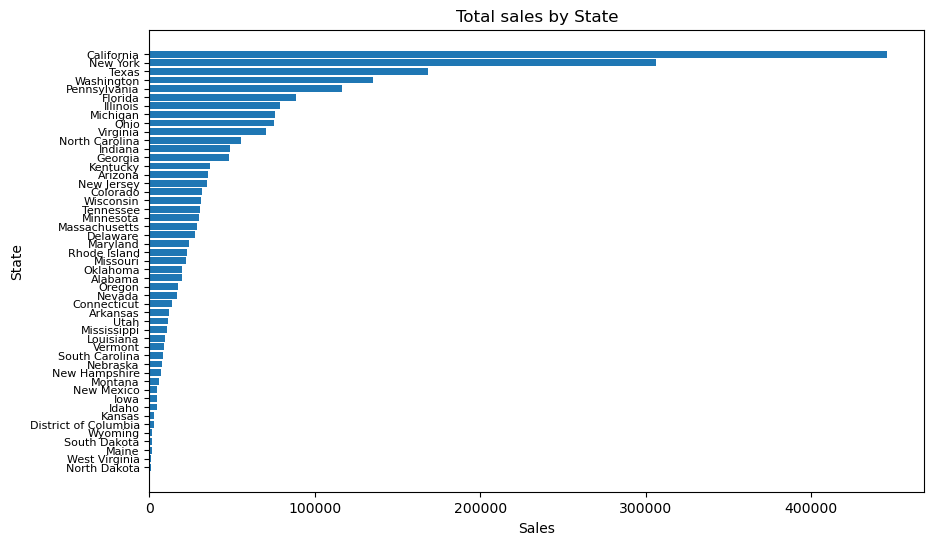

In [76]:
plt.figure(figsize=(10, 6))
plt.barh(sales_per_state["State"],sales_per_state["Sales"])
plt.xlabel("Sales")
plt.ylabel("State")
plt.title("Total sales by State")
plt.gca().invert_yaxis()
plt.yticks(fontsize=8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

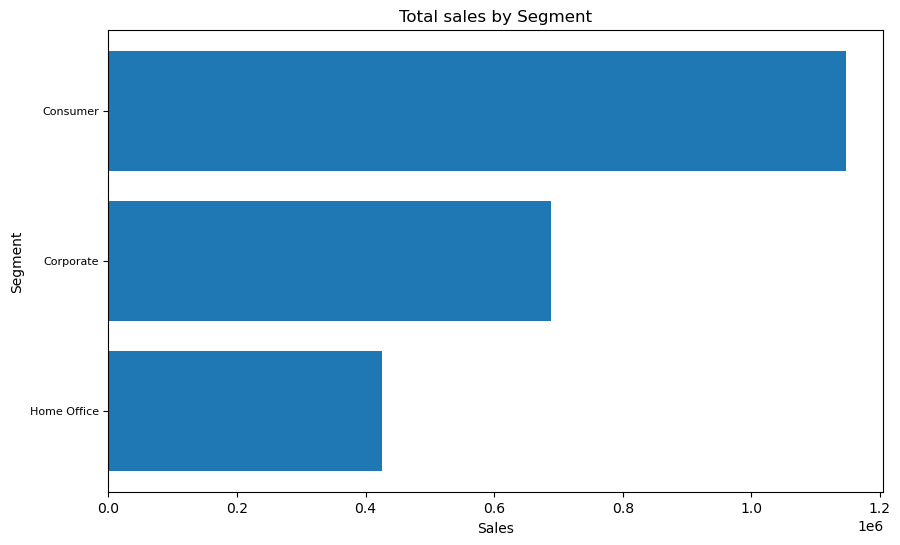

In [77]:
#c.
#Group by segment
sales_per_segment = df.groupby("Segment")["Sales"].sum().reset_index()
sales_per_segment = sales_per_segment.sort_values(by="Sales", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sales_per_segment["Segment"],sales_per_segment["Sales"])
plt.xlabel('Sales')
plt.ylabel('Segment')
plt.title("Total sales by Segment")
plt.gca().invert_yaxis()
plt.yticks(fontsize=8)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

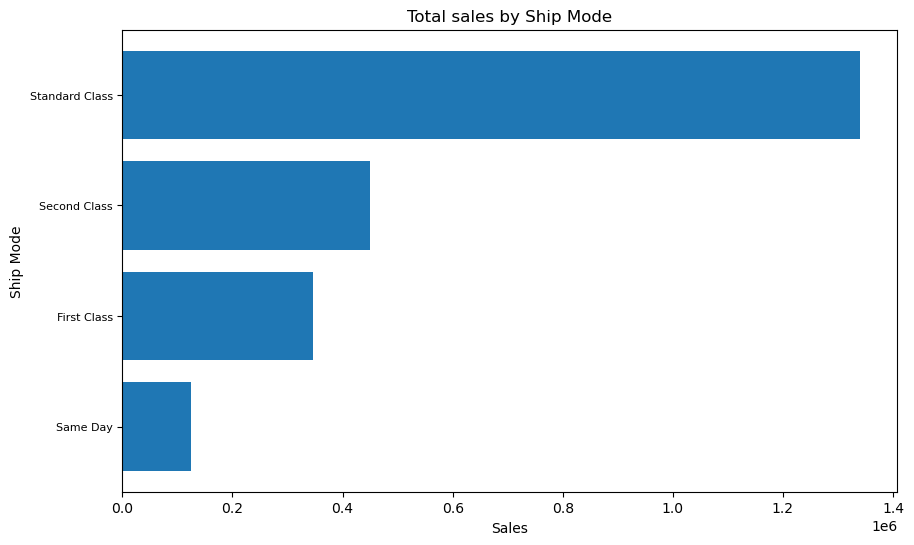

In [78]:
#c.
#Group by Ship Mode
sales_by_ship_mode = df.groupby("Ship Mode")["Sales"].sum().reset_index()
sales_by_ship_mode = sales_by_ship_mode.sort_values(by="Sales", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sales_by_ship_mode["Ship Mode"],sales_by_ship_mode["Sales"])
plt.xlabel('Sales')
plt.ylabel('Ship Mode')
plt.title("Total sales by Ship Mode")
plt.gca().invert_yaxis()
plt.yticks(fontsize=8)
plt.show

In [79]:
#create a column with the the order date in format mmyy
calculate total sales per month
plot total sales per month
calculate the total sales per category per month
plot graphs separately

SyntaxError: invalid syntax (3085508405.py, line 2)

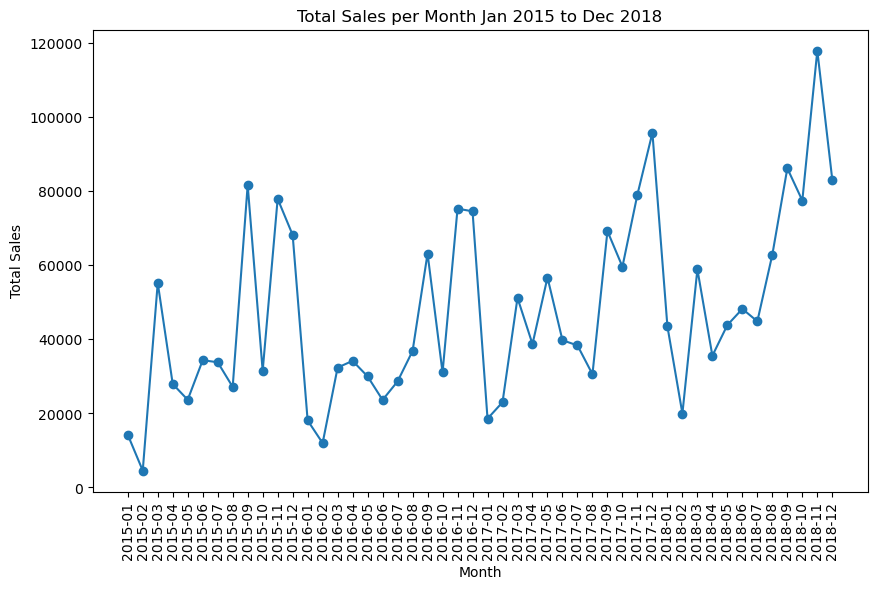

In [80]:
df["Order_Date2"] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df["Month"] = df["Order_Date2"].dt.to_period('M')  

monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()

#total sales per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales["Month"].astype(str), monthly_sales["Sales"], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title("Total Sales per Month Jan 2015 to Dec 2018")
plt.xticks(rotation=90)
plt.show()

In [81]:
#calculate total sales per category per month


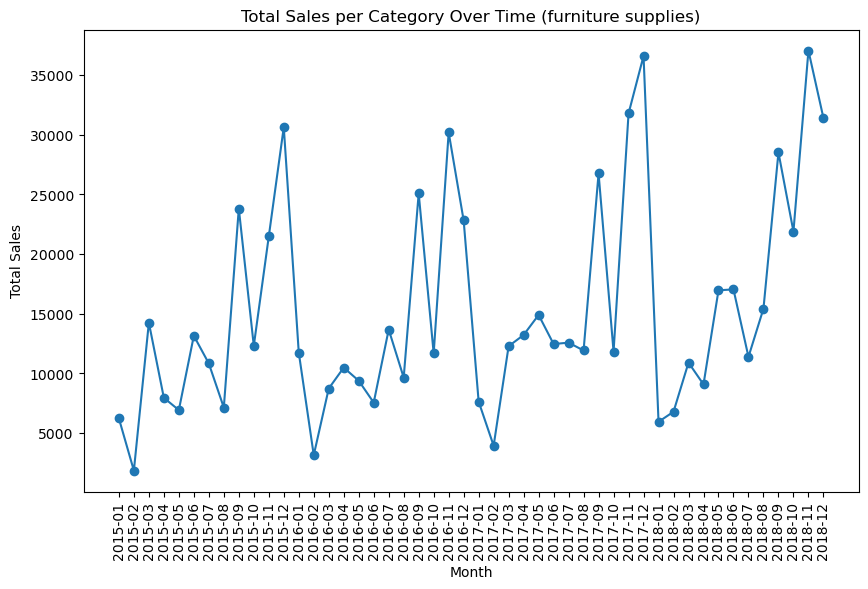

In [82]:
#d.
furniture_df = df[df["Category"] == "Furniture"]
f_monthly_sales = furniture_df.groupby(["Month","Category"])["Sales"].sum().reset_index()

plt.figure(figsize=(10, 6))
for category in f_monthly_sales["Category"].unique():
    subset = f_monthly_sales[f_monthly_sales['Category'] == category]
    plt.plot(subset["Month"].astype(str), subset["Sales"], marker='o',label=category)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title("Total Sales per Category Over Time (furniture supplies)")
plt.xticks(rotation=90)
plt.show()

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(f_monthly_sales["Month"].astype(str), f_monthly_sales["Sales"], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title(Total Sales per Category Over Time (furniture supplies)")
plt.xticks(rotation=90)
plt.show()

SyntaxError: unterminated string literal (detected at line 5) (3235926525.py, line 5)

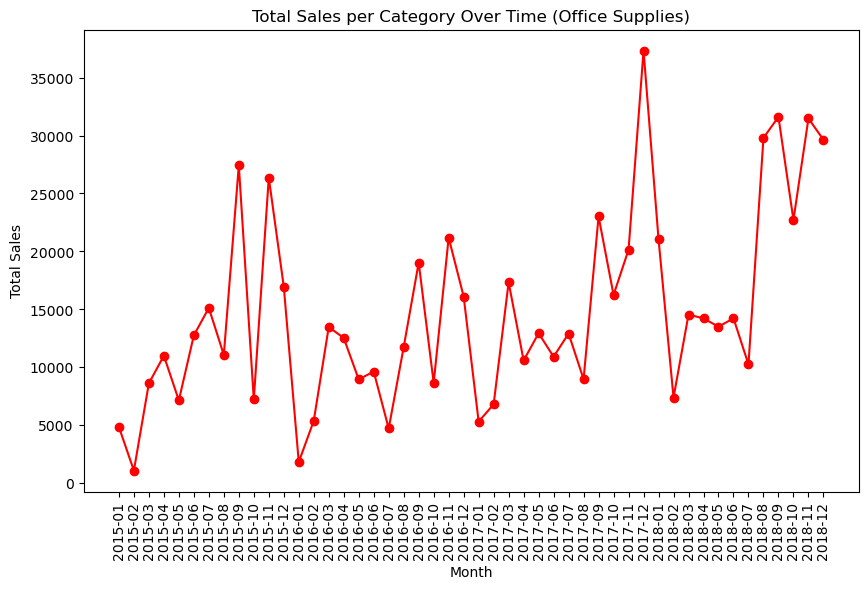

In [83]:
office_df = df[df["Category"] == "Office Supplies"]
o_monthly_sales = office_df.groupby(["Month","Category"])["Sales"].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(o_monthly_sales["Month"].astype(str), o_monthly_sales["Sales"], marker='o',color="red")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title("Total Sales per Category Over Time (Office Supplies)")
plt.xticks(rotation=90)
plt.show()

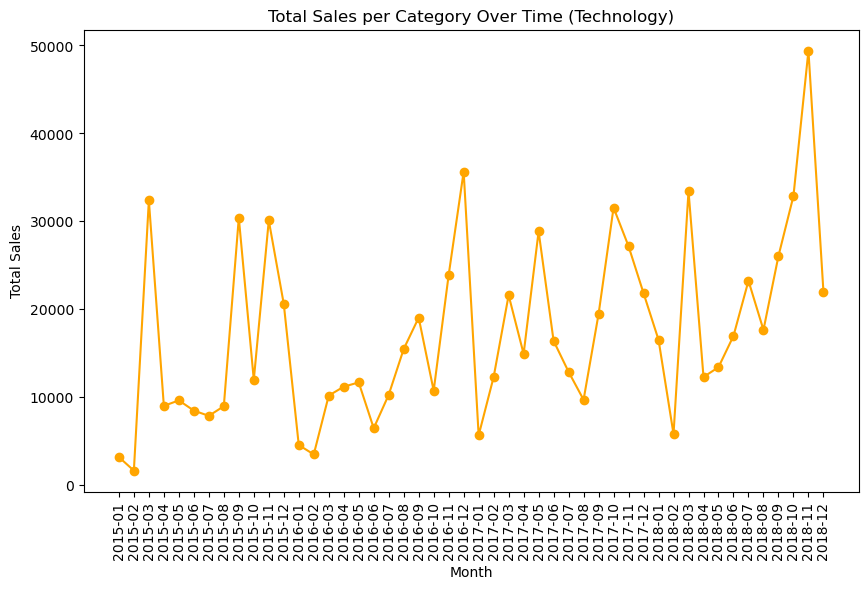

In [84]:
tech_df = df[df["Category"] == "Technology"]
t_monthly_sales = tech_df.groupby(["Month","Category"])["Sales"].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(t_monthly_sales["Month"].astype(str), t_monthly_sales["Sales"], marker='o',color="orange")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title("Total Sales per Category Over Time (Technology)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
########Question 2

In [94]:
df["Order_Date2"] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df.set_index("Order_Date2", inplace=True)
#a.

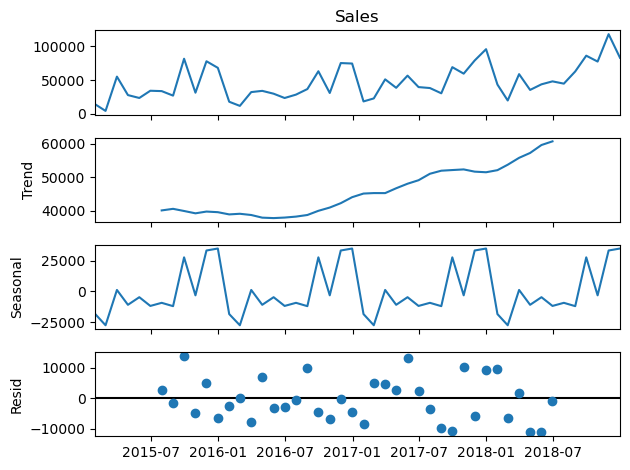

In [96]:
#group per month and perform additional sum the sale
monthly_sales = df["Sales"].resample("M").sum()
decomp = seasonal_decompose(monthly_sales, model= "additive")
fig = decomp.plot()
plt.show()


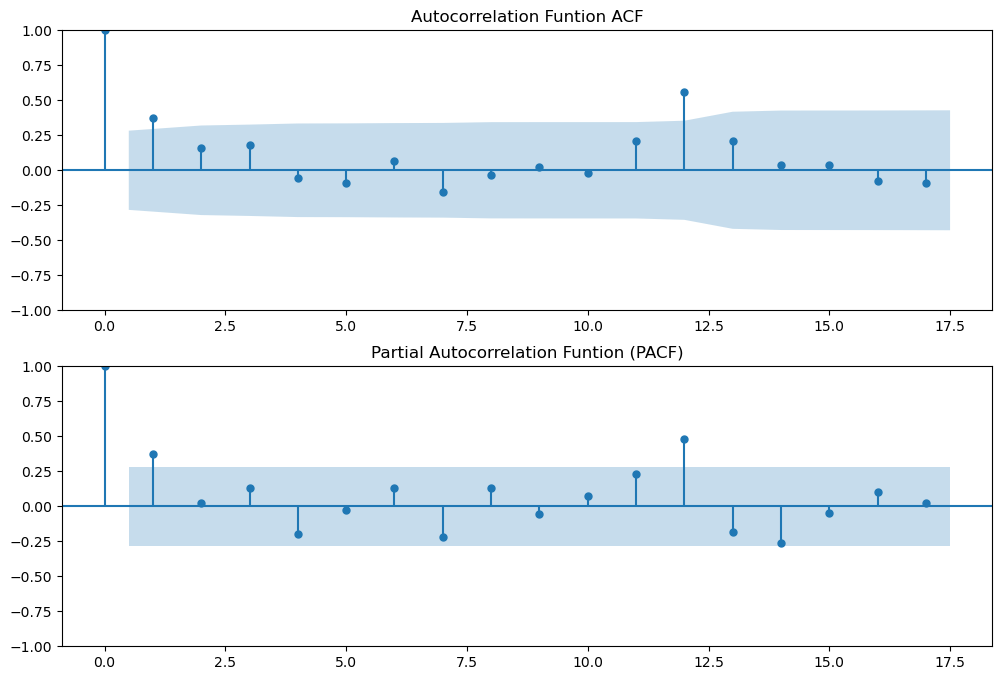

In [102]:
#b.
#ACF and PACF

fig, ax= plt.subplots(2, figsize= (12, 8))
plot_acf(monthly_sales, ax=ax[0])
ax[0].set_title("Autocorrelation Funtion ACF")
plot_pacf(monthly_sales, ax=ax[1])
ax[1].set_title("Partial Autocorrelation Funtion (PACF)")
plt.show()

In [105]:
#c. (may be used to deterct stationarity)
result = adfuller(monthly_sales.dropna())
print("ASD Statistic: ", result[0])
print("P-value: ", result[1])
print("Critical Values: ")
for key, value in result[4].items():
    print(f' {key}: {value}')
 

ASD Statistic:  -4.416136761430769
P-value:  0.00027791039276670623
Critical Values: 
 1%: -3.5778480370438146
 5%: -2.925338105429433
 10%: -2.6007735310095064


In [ ]:
#Question 3

In [108]:
#a.
hw_model = ExponentialSmoothing(monthly_sales, 
                                trend= "add",
                                seasonal= "add",
                                seasonal_periods= 12).fit()

C:\Users\Emmanuel\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


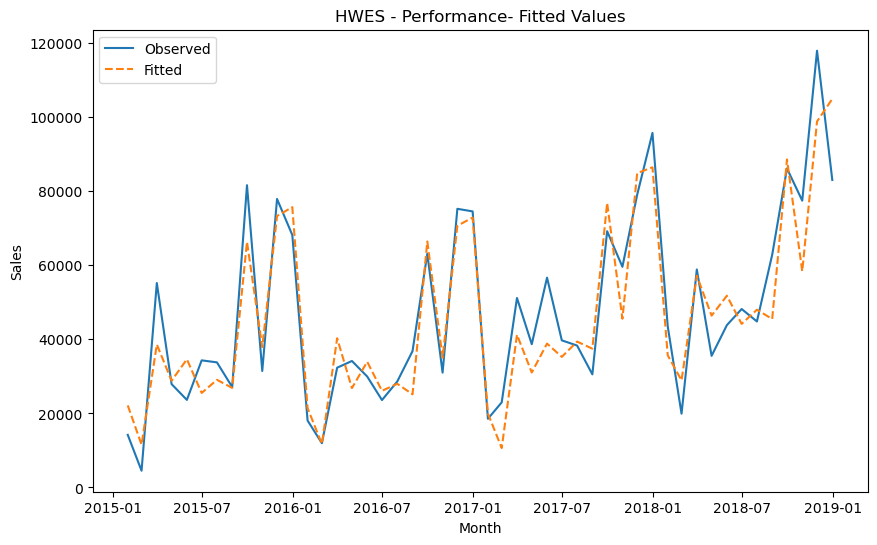

In [109]:
#b.
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label="Observed")
plt.plot(hw_model.fittedvalues, label="Fitted", linestyle="--")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("HWES - Performance- Fitted Values")
plt.legend()
plt.show()

In [113]:
#performance of model

mae= mean_absolute_error(monthly_sales, hw_model.fittedvalues)
mse= mean_squared_error(monthly_sales, hw_model.fittedvalues)

print(f"Mean Absolute Error: {mae}" )
print(f"Mean Squared Error: {mse}" )

Mean Absolute Error: 7601.389595287532
Mean Squared Error: 88298141.4937501


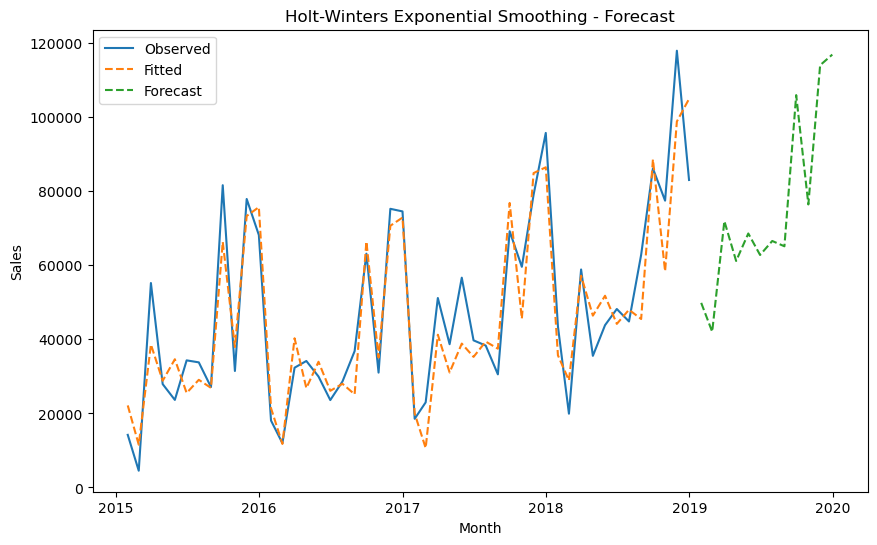

In [115]:
#c.
forecarst= hw_model.forecast(12)

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label="Observed")
plt.plot(hw_model.fittedvalues, label="Fitted", linestyle="--")
plt.plot(forecarst, label="Forecast", linestyle="--")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Holt-Winters Exponential Smoothing - Forecast")
plt.legend()
plt.show()

In [117]:
#Question 4
#a.
#Auto correlation
#

In [119]:
ar_model = AutoReg(monthly_sales, lags=12).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   48
Model:                    AutoReg(12)   Log Likelihood                -386.279
Method:               Conditional MLE   S.D. of innovations          11059.410
Date:                Thu, 11 Jul 2024   AIC                            800.558
Time:                        20:38:19   BIC                            822.727
Sample:                    01-31-2016   HQIC                           808.296
                         - 12-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04   1.32e+04     -0.892      0.373   -3.78e+04    1.42e+04
Sales.L1       0.2716      0.098      2.758      0.006       0.079       0.465
Sales.L2      -0.0804      0.111     -0.725      0.4

In [123]:
ma_model = ARIMA(monthly_sales, order =(0, 0, 12)).fit()
print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                ARIMA(0, 0, 12)   Log Likelihood                -543.944
Date:                Thu, 11 Jul 2024   AIC                           1115.888
Time:                        21:48:40   BIC                           1142.084
Sample:                    01-31-2015   HQIC                          1125.787
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.712e+04    1.4e+04      3.354      0.001    1.96e+04    7.47e+04
ma.L1          0.2819      0.394      0.716      0.474      -0.490       1.054
ma.L2          0.2292      0.466      0.492      0.6

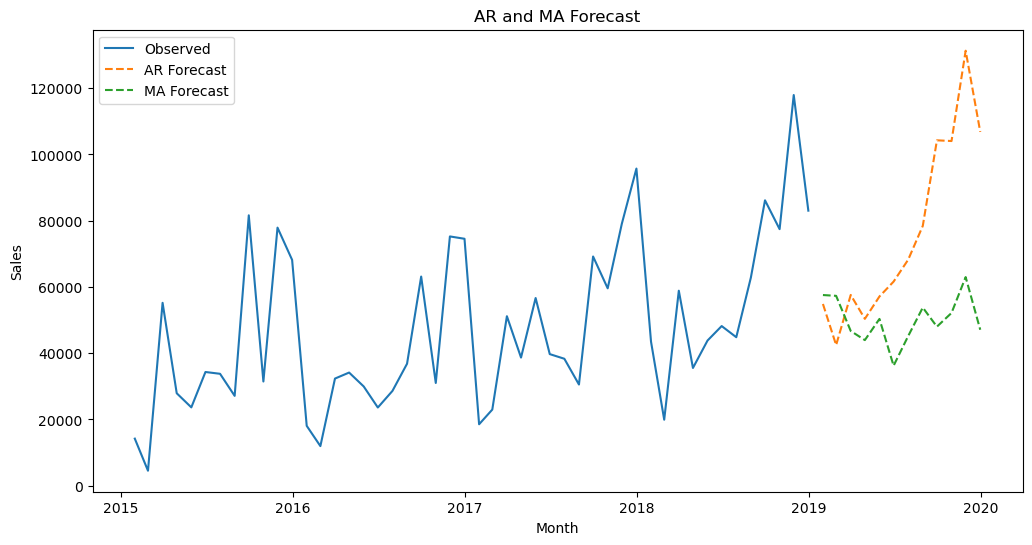

In [125]:
#b.
ar_forecast = ar_model.predict(start=len(monthly_sales), end=len(monthly_sales) + 11)

ma_forecast = ma_model.predict(start=len(monthly_sales), end=len(monthly_sales) + 11)

#plot
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label= "Observed")
plt.plot(ar_forecast, label="AR Forecast", linestyle="--")
plt.plot(ma_forecast, label="MA Forecast", linestyle="--")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("AR and MA Forecast")
plt.legend()
plt.show()

In [130]:
#ARIMA
#4.2.
arima_model = ARIMA (monthly_sales, order=(12, 0, 12)).fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:               ARIMA(12, 0, 12)   Log Likelihood                -540.320
Date:                Thu, 11 Jul 2024   AIC                           1132.640
Time:                        22:27:50   BIC                           1181.291
Sample:                    01-31-2015   HQIC                          1151.026
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.712e+04   2.68e+04      1.758      0.079   -5404.118    9.96e+04
ar.L1          0.3757      4.263      0.088      0.930      -7.979       8.730
ar.L2         -0.3973      3.478     -0.114      0.9

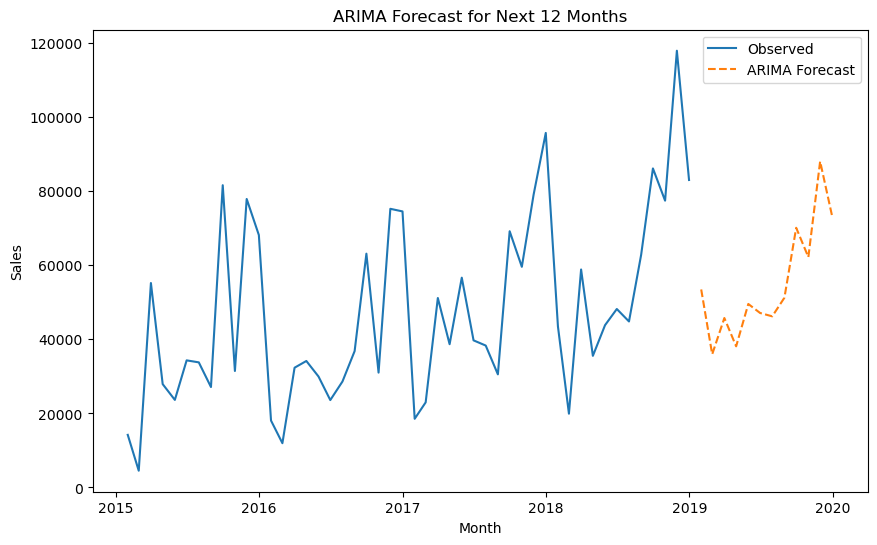

In [128]:
#ARIMA
#4.2.
arima_forecast = arima_model.forecast(steps=12)

plt.figure(figsize = (10, 6))
plt.plot(monthly_sales, label="Observed")
plt.plot(arima_forecast, label="ARIMA Forecast", linestyle="--")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("ARIMA Forecast for Next 12 Months")
plt.legend()
plt.show()

In [133]:
#4.3.
#SARIMA

sarima_model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1,1,1,12)).fit()
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -383.926
Date:                            Thu, 11 Jul 2024   AIC                            777.851
Time:                                    22:34:06   BIC                            785.628
Sample:                                01-31-2015   HQIC                           780.536
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5094      0.234      2.179      0.029       0.051       0.968
ma.L1         -0.9007      0.185   

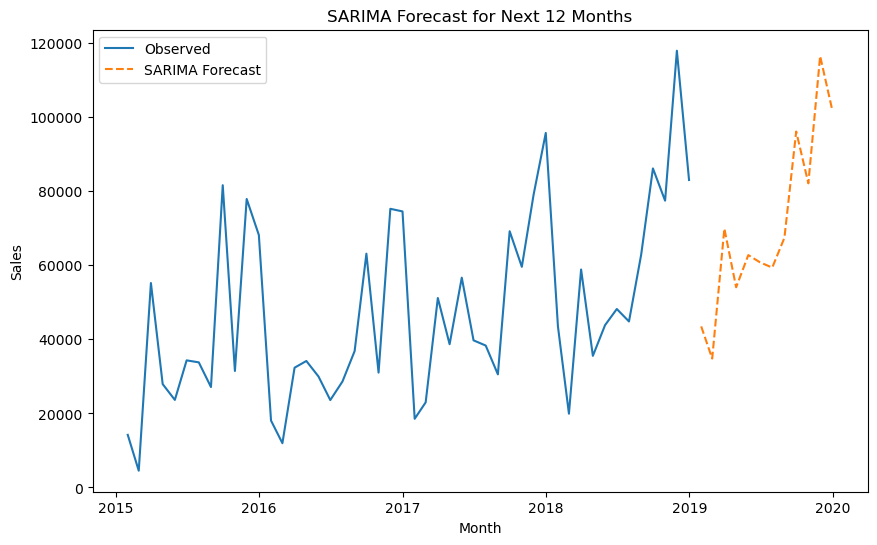

In [134]:
sarima_forecast = sarima_model.forecast(steps=12)

plt.figure(figsize = (10, 6))
plt.plot(monthly_sales, label="Observed")
plt.plot(sarima_forecast, label="SARIMA Forecast", linestyle="--")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("SARIMA Forecast for Next 12 Months")
plt.legend()
plt.show()